# Matriz de adjacência

Outra forma de representar um grafo é utilizar a matriz de adjacência. Nessa estrutura, todos os vértices são representados nas linhas e nas colunas.

### Exemplo:
<img src="./Imagens/grafoNaoDirecionadoMatrizAdj.png">

A tabela é montada geralmente com o valor 1 representando a adjacência de dois vértices, ou o valor do peso da aresta. O valor 0 representa a não adjacência, ou outro número (dependendo do contexto) para representar a não ligação entre os vértices em questão.

In [1]:
# Matriz de adjacência
matrizAdj = [[0, 1, 0, 1, 0, 0, 0, 0, 0],
             [1, 0, 1, 0, 0, 0, 0, 0, 0],
             [0, 1, 0, 0, 1, 1, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 1, 0, 0],
             [0, 0, 1, 0, 0, 0, 1, 0, 0],
             [0, 0, 1, 0, 0, 0, 0, 0, 1],
             [0, 0, 0, 1, 1, 0, 0, 1, 0],
             [0, 0, 0, 0, 0, 0, 1, 0, 1],
             [0, 0, 0, 0, 0, 1, 0, 1, 0]]
print(matrizAdj)

[[0, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 0, 1, 0]]


### Exemplo grafo direcionado
Em grafos direcionados, a única diferença na representação é que não necessariamente temos uma matriz simétrica. Geralmente representamos a relação de adjacência com valores {0, 1}, ou o valor do peso caso exista.

<img src="./Imagens/grafoDirecionadoMatrizAdj2.png">
A adjacência é representada na matriz de um grafo direcionado em relação ao vértice de origem e destino.

### Exemplo de matriz de um grafo com pesos

<img src="./Imagens/grafoMatrizAdjPesos.png">

In [1]:
grafo_direcionado = [[0, 18, 33, 0, 0],
                     [0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0],
                     [22, 25, 0, 0, 49],
                     [0, 7, 0, 0, 0]]
vertices = [(0, 'F'), (1, 'L'), (2, 'E'), (3, 'H'), (4, 'P')]

# Código

In [21]:
## Matriz de adjacencia

import random
from math import inf

class Grafo():
    def __init__(self, direcionado=False, valorado=False, grafo_matriz_adjacencia=[]):
        '''
        Construtor padrao, cria uma matriz de adjacencia com zeros para ser preenchida, por padrao os grafos criados sao nao direcionados 
        e nao valorados, para utilizar grafos direcionados ou valorados e necessario passar o grafo por parametro 
        Parametros:
            direcionado
                flag para determinar se o grafo e direcionado ou nao
            valorado
                flag para determinar se o grafo e valorado ou nao
            grafo_adjacencia
                matriz de adjacencia passada por parametro
        '''
        self.grafo_direcionado = direcionado
        self.grafo_valorado = valorado
        if direcionado == False and not grafo_matriz_adjacencia:
            # Tamanho da matriz com o numero de vertices definido aleatoriamente entre 6 e 15
            self.tamanho_matriz = random.randrange(6, 15)   
            
            # Criacao da matriz de adjacencia com zeros em todas as posicoes
            if not grafo_matriz_adjacencia and not direcionado:
                self.matriz_de_adjacencia = [[0 for x in range(self.tamanho_matriz)] for y in range(self.tamanho_matriz)]
            
            # Gera adjacencias no grafo
            self.criar_grafo_nao_direcionado_nao_valorado()
            
        if grafo_matriz_adjacencia:
            self.matriz_de_adjacencia = grafo_matriz_adjacencia
        
        # A lista vertices contem todos os vertices presentes no grafo, a lista e atualizada a cada remocao
        # ou insercao, como nao existe ordem para adicionar vertices essa lista e importante para encontrar
        # os indices na matriz
        self.vertices = []
        self.tamanho_matriz = len(self.matriz_de_adjacencia)
        for i in range(1, self.tamanho_matriz+1, 1):
            self.vertices.append(i)
            
        #print(self.matriz_de_adjacencia)

    def criar_grafo_nao_direcionado_nao_valorado(self):
        '''
           Cria grafos nao valorados criando uma relacao de ajacencia entre vertices aleatoriamente
        ''' 
        for i in range(self.tamanho_matriz):
            for j in range(self.tamanho_matriz):
                aleatorio = random.uniform(0, 1)
                if aleatorio > 0.9:
                    self.matriz_de_adjacencia[i][j] = 1
                    self.matriz_de_adjacencia[j][i] = 1
        print("Grafo: ", self.matriz_de_adjacencia)
        
        matriz_networkx = self.matriz_de_adjacencia
        return matriz_networkx

    def eh_vizinho(self, u, v):
        '''
        Funcao que recebe dois vertices e verifica se ambos sao adjacentes 
        um vertice e considerado adjacente ao outro em uma matriz de adjacencia se
        nas posicoes [u][v] e [v][u] para grafos nao direcionados e [u][v] para grafos
        direcionados o valor na matriz for diferente de 0
        Parametros:
            u 
                vertice de partida
            v 
                vertice de chegada
        '''
        # u  e v recebem o valor de seu indice na matriz
        u = self.vertices.index(u)
        v = self.vertices.index(v)
        if self.matriz_de_adjacencia[u][v] > 0:
            return True
        else:
            return False

    def retorna_vizinhos(self, u):
        '''
        Retorna todos os vertices adjacentes ao vertice u passado por parametro
        Parametros:
            u 
                vertice que queremos conhecer seus vizinhos
        '''        
        vizinhos = []
        # u precisa estar presente no grafo
        if u in self.vertices:
            u = self.vertices.index(u)
            for i in range(len(self.matriz_de_adjacencia)):
                # Os vizinhos de u, sao os valores de v que tem valor diferente de 0 na linha 
                # do vertice u da matriz
                if self.matriz_de_adjacencia[u][i] != 0:
                    index = self.vertices[i]
                    vizinhos.append(index)
            return vizinhos

    
    def inserir_vertice(self, u):
        '''
        Insere um vertice por vez na matriz, é possivel inserir um vertice isolado e determinar se o grafo é direcionado ou nao
        Parametros
            u 
                vertice a ser adicionado
        '''
           
        if u not in self.vertices:
            self.vertices.append(u)
            self.tamanho_matriz += 1
            for i in range(len(self.matriz_de_adjacencia)):
                self.matriz_de_adjacencia[i].append(0)
            linha = []
            for j in range(self.tamanho_matriz):
                linha.append(0)
            self.matriz_de_adjacencia.append(linha)
               
            print("Matriz de adjacencia apos inserir o vertice : ", self.vertices[-1], self.matriz_de_adjacencia, "\n")

    
    def inserir_aresta(self, u, v, peso, direcionado=False):
        '''
        Insere uma aresta no grafo e seu respectivo peso, caso tenha. Por padrao o grafo e considerado nao direcionado, para inseir uma aresta 
        direcionada e necessario adcionar a flag True como parametro
        Parametros:
            u 
                vertice de partida
            v 
                vertice de chegada
            peso 
                valor do peso da aresta
            direcionado 
                se o grafo e direcionado ou nao
        '''
        if u in self.vertices and v in self.vertices:
            u = self.vertices.index(u)
            v = self.vertices.index(v)
            if not direcionado and peso == 0:
                self.matriz_de_adjacencia[u][v] = 1
                self.matriz_de_adjacencia[v][u] = 1
            elif not direcionado and peso != 0:
                self.matriz_de_adjacencia[u][v] = peso
                self.matriz_de_adjacencia[v][u] = peso
            elif direcionado and peso != 0:
                self.matriz_de_adjacencia[u][v] = peso
        else:
            print("Algum dos vertices ou ambos nao existem")
    
    def gerar_lista_de_arestas(self):
        '''
        Retorna um lista contendo todas arestas do grafo (u, v)
        '''
        arestas = []
        for i in self.vertices:
            for j in self.vertices:
                # Se os vertices forem adjacentes na matriz, (u, v) e adicionado a arestas
                
                if self.matriz_de_adjacencia[self.vertices.index(i)][self.vertices.index(j)]:
                    arestas.append((i, j))
        return arestas

    def remover_vertice(self, u):
        '''
        Remove um vertice da matriz, para tanto a funcao remove a linha e a coluna
        do vertice passado por parametro
        Parametros: 
            u 
                vertice que queremos remover
        '''
        if u in self.vertices:
            index_u = self.vertices.index(u)
            self.vertices.remove(self.vertices[index_u])
            # deleta toda a linha que corresponde ao vertice u
            del self.matriz_de_adjacencia[index_u]
            for i in range(len(self.matriz_de_adjacencia)):
                # deleta toda a coluna do vertice u
                del self.matriz_de_adjacencia[i][index_u]

            print("Matriz ao remover o vertice u: ", u, self.matriz_de_adjacencia, "\n")

    def remover_aresta(self, u, v):
        '''
        Remove uma aresta (u, v), para tanto basta na matriz atribuir o valor 0
        que reprensenta que dois vertices nao sao adjacentes
        Parametros:
            u 
                vertice de partida
            v 
                vertice de chegada
        '''
        if u in self.vertices and v in self.vertices:
            index_u = self.vertices.index(u)
            index_v = self.vertices.index(v)
            if not self.grafo_direcionado:
                self.matriz_de_adjacencia[index_u][index_v] = 0
                self.matriz_de_adjacencia[index_v][index_u] = 0
            else:
                self.matriz_de_adjacencia[index_u][index_v] = 0
            print("Matriz de adjacencia ao remover (u,v) ",
                  u, v, self.matriz_de_adjacencia, "\n")
        else:
            print("Algum dos vertices ou ambos nao existem no grafo")     


    def deletar_grafo(self):
        '''
        Deleta a matriz
        '''
        del self.matriz_de_adjacencia

    def matriz_de_adjacencia_para_lista(self):
        '''
        Metodo para tranforma a matriz de adjacencia em lista de adjacencia, a lista
        de adjacencia usa a estrutura dict
        '''
        # A lista adjacencias recebe as listas com os vizinhos de cada vertice presente
        # no grafo
        adjacencias = []

        for i in self.vertices:
            adjacencias.append(self.retorna_vizinhos(i))        
        
        
        self.lista_adjacencia = {}
        for i in self.vertices:
            self.lista_adjacencia.update({i: {}} )   
            
        if not self.grafo_valorado:            
            for i in range(len(adjacencias)):
                for j in range(len(adjacencias[i])):
                    self.lista_adjacencia[self.vertices[i]].update({adjacencias[i][j]: 0})
        else:
            for i in range(len(adjacencias)):
                for j in range(len(adjacencias[i])):                    
                    self.lista_adjacencia[self.vertices[i]].update({adjacencias[i][j]: 
                        self.matriz_de_adjacencia[self.vertices.index(self.vertices[i])][self.vertices.index(adjacencias[i][j])]})
        
        #print('Adjacencias', adjacencias)
        print("Lista de adjacencia: ", self.lista_adjacencia)    
        return self.lista_adjacencia
       
    def matriz_de_adjacencia_para_matriz_de_incidencia(self):
        '''
        Metodo para criar uma matriz de incidencia a partir de uma matriz de adjacencia
        '''
        arestas = []
        arestas = (self.gerar_lista_de_arestas())        

        # cria uma matriz com tamanho num_vertices x num_arestas de zeros
        self.matriz_de_incidencia = [
            [0 for x in range(len(arestas))] for y in range(self.tamanho_matriz)]
        
        if not self.grafo_valorado and not self.grafo_direcionado:
            for i in range(len(self.vertices)):
                for j in range(len(arestas)):
                    # verifica adjacencia para indicar a incidencia
                    if self.vertices[i] in arestas[j]:
                        self.matriz_de_incidencia[i][j] = 1
                        self.matriz_de_incidencia[self.vertices.index(arestas[j][1])][j] = 1
                        
        if not self.grafo_valorado and self.grafo_direcionado:
            for i in range(len(self.vertices)):
                for j in range(len(arestas)):
                    # verifica adjacencia para indicar a incidencia
                    if self.vertices[i] in arestas[j]:
                        if arestas[j][0] != arestas[j][1]:
                            self.matriz_de_incidencia[i][j] = 1
                            self.matriz_de_incidencia[self.vertices.index(arestas[j][1])][j] = -1
                        else:
                            self.matriz_de_incidencia[i][j] = 2

                        
        elif self.grafo_direcionado and self.grafo_valorado:
            for i in range(len(self.vertices)):
                for j in range(len(arestas)):
                    # verifica adjacencia para indicar incidencia
                    if self.vertices[i] in arestas[j] and self.vertices[i] == arestas[j][0]:
                        self.matriz_de_incidencia[i][j] =  \
                        self.matriz_de_adjacencia[self.vertices.index(arestas[j][0])][self.vertices.index(arestas[j][1])]
                    elif self.vertices[i] in arestas[j] and self.vertices[i] == arestas[j][1]:
                        self.matriz_de_incidencia[i][j] =  \
                        -self.matriz_de_adjacencia[self.vertices.index(arestas[j][0])][self.vertices.index(arestas[j][1])]
        
        elif self.grafo_direcionado and not self.grafo_valorado:
            for i in range(len(self.vertices)):
                for j in range(len(arestas)):
                    # verifica adjacencia para indicar incidencia
                    if self.vertices[i] in arestas[j] and self.vertices[i] == arestas[j][0]:
                        self.matriz_de_incidencia[i][j] =  1
                    elif self.vertices[i] in arestas[j] and self.vertices[i] == arestas[j][1]:
                        self.matriz_de_incidencia[i][j] =  -1
      

        print("Arestas: ", arestas)
        print("Matriz de incidencia: ", self.matriz_de_incidencia, "\n")

    def gerar_subgrafo_ind_vertices(self):
        '''
        Gera um subgrafo induzido por vertices escolhendo de forma aleatoria a quantidade
        e quais vertices a serem retirados.
        '''

        num_of_vertices = len(self.vertices)
        print("Numero de vertices: ", num_of_vertices)
        qntde_vertices_a_remover = random.randrange(0, num_of_vertices+1)
        print("Quantidade de vertices a remover: ", qntde_vertices_a_remover)

        vertices_a_remover = []
        vertices_a_remover.extend(random.sample(
            self.vertices, qntde_vertices_a_remover))
        print("Vertices a remover: ", vertices_a_remover)

        for i in vertices_a_remover:
            self.remover_vertice(i)
        print("Vertices presentes: ", self.vertices)
        print('Matriz atualizada: ', self.matriz_de_adjacencia, "\n")

    def gerar_subgrafo_ind_arestas(self):
        '''
        Gera um subgrafo induzido por vertices escolhendo de forma aleatoria a quantidade
        e quais vertices a serem retirados.
        '''
        arestas = []
        arestas.extend(self.gerar_lista_de_arestas())
        print('Arestas presentes: ', arestas)
        print("Numero de arestas: ", len(arestas))
        qntde_arestas_a_remover = random.randrange(0, len(arestas)+1)
        print("Quantidade de arestas a remover: ",
              qntde_arestas_a_remover)

        arestas_a_remover = []
        arestas_a_remover.extend(random.sample(
            arestas, qntde_arestas_a_remover))
        print("arestas a remover: ", arestas_a_remover)

        for i in range(len(arestas_a_remover)):
            for j in range(1):
                self.remover_aresta(
                    arestas_a_remover[i][j], arestas_a_remover[i][j+1])

        print("Arestas presentes: ", self.gerar_lista_de_arestas())
        print('Matriz atualizada: ', self.matriz_de_adjacencia, "\n")


In [22]:
## obs: para executar essa célula é necessário antes executar células anteriores respectivas ao código

# Matriz de adjacencia:
grafo_direcionado = [[0, 18, 33, 0, 0],
                     [0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0],
                     [22, 25, 0, 0, 49],
                     [0, 7, 0, 0, 0]]


grafo = Grafo(True, True, grafo_direcionado)


Lista de adjacencia:  {1: {2: 18, 3: 33}, 2: {}, 3: {}, 4: {1: 22, 2: 25, 5: 49}, 5: {2: 7}}


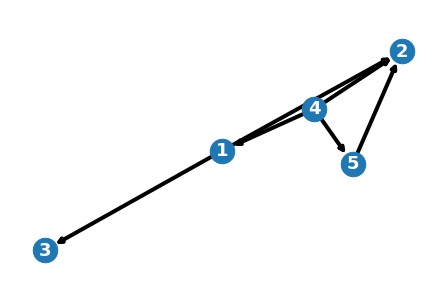

In [23]:
## obs: para executar essa célula é necessário antes executar células anteriores respectivas ao código

###########  Desenhando o grafo com networkx e matplotlib ############
import networkx as nx
import matplotlib.pyplot as plt

# O grafo é gerado aleatoriamente, a cada execução do algotimo, um diferente grafo será criado
lista_adjacencia = grafo.matriz_de_adjacencia_para_lista()
G = nx.DiGraph(lista_adjacencia)
nx.draw(G, with_labels=True, font_weight='bold', node_size=600, font_size=18, width=4, font_color='w')
plt.show()

In [24]:
## obs: para executar essa célula é necessário antes executar células anteriores respectivas ao código

print("o vértice 1 é vizinho do vértice 3? ", grafo.eh_vizinho(1, 3))

o vértice 1 é vizinho do vértice 3?  True


In [25]:
print("Retorna os vizinhos de 5: ", grafo.retorna_vizinhos(5))

Retorna os vizinhos de 5:  [2]


In [26]:
grafo.inserir_vertice(20)

Matriz de adjacencia apos inserir o vertice :  20 [[0, 18, 33, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [22, 25, 0, 0, 49, 0], [0, 7, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]] 



In [27]:
grafo.inserir_aresta(1, 6, 0)

Algum dos vertices ou ambos nao existem


In [28]:
grafo.remover_aresta(2, 4)

Matriz de adjacencia ao remover (u,v)  2 4 [[0, 18, 33, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [22, 25, 0, 0, 49, 0], [0, 7, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]] 



In [29]:
grafo.remover_vertice(3)

Matriz ao remover o vertice u:  3 [[0, 18, 0, 0, 0], [0, 0, 0, 0, 0], [22, 25, 0, 49, 0], [0, 7, 0, 0, 0], [0, 0, 0, 0, 0]] 



In [30]:
#grafo.deletar_grafo()

In [31]:
grafo.matriz_de_adjacencia_para_lista()

Lista de adjacencia:  {1: {2: 18}, 2: {}, 4: {1: 22, 2: 25, 5: 49}, 5: {2: 7}, 20: {}}


{1: {2: 18}, 2: {}, 4: {1: 22, 2: 25, 5: 49}, 5: {2: 7}, 20: {}}

In [32]:
grafo.matriz_de_adjacencia_para_matriz_de_incidencia()

Arestas:  [(1, 2), (4, 1), (4, 2), (4, 5), (5, 2)]
Matriz de incidencia:  [[18, -22, 0, 0, 0], [-18, 0, -25, 0, -7], [0, 22, 25, 49, 0], [0, 0, 0, -49, 7], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]] 



In [33]:
grafo.gerar_subgrafo_ind_vertices()

Numero de vertices:  5
Quantidade de vertices a remover:  5
Vertices a remover:  [4, 2, 1, 20, 5]
Matriz ao remover o vertice u:  4 [[0, 18, 0, 0], [0, 0, 0, 0], [0, 7, 0, 0], [0, 0, 0, 0]] 

Matriz ao remover o vertice u:  2 [[0, 0, 0], [0, 0, 0], [0, 0, 0]] 

Matriz ao remover o vertice u:  1 [[0, 0], [0, 0]] 

Matriz ao remover o vertice u:  20 [[0]] 

Matriz ao remover o vertice u:  5 [] 

Vertices presentes:  []
Matriz atualizada:  [] 



In [18]:
grafo.gerar_subgrafo_ind_arestas()

Arestas presentes:  []
Numero de arestas:  0
Quantidade de arestas a remover:  0
arestas a remover:  []
Arestas presentes:  []
Matriz atualizada:  [] 

